In [ ]:
# ============================================
# 🚀 ETAPA DE PREPARAÇÃO DE DADOS - EXEMPLO
# ============================================

import pandas as pd
import numpy as np
from datetime import datetime

# --- 1️⃣ CARREGAR DADOS -------------------------------------------------------

# Exemplo: substitua 'dados_brutos.csv' pelo seu arquivo real
df = pd.read_csv('/content/PicMoney-Base_Cadastral_de_Players-10_000 linhas (1).csv', sep=';')

print("Registros iniciais:", len(df))

# --- 2️⃣ LIMPEZA --------------------------------------------------------------

# Remover duplicatas
df = df.drop_duplicates()

# Tratar valores ausentes
cols_local = ['cidade_trabalho', 'bairro_trabalho', 'cidade_escola', 'bairro_escola']
df[cols_local] = df[cols_local].fillna('Não informado')

# Padronizar cidade_residencial e bairro_residencial se houver NaN
df['cidade_residencial'] = df['cidade_residencial'].fillna('Não informado')
df['bairro_residencial'] = df['bairro_residencial'].fillna('Não informado')

# Converter data de nascimento
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], errors='coerce', dayfirst=True)

# Recalcular idade, se desejar garantir consistência
df['idade_corrigida'] = df['data_nascimento'].apply(
    lambda x: datetime.now().year - x.year if pd.notnull(x) else np.nan
)
# Substituir idade original se houver diferença grande
df['idade'] = np.where(abs(df['idade'] - df['idade_corrigida']) > 1,
                       df['idade_corrigida'], df['idade'])
df = df.drop(columns=['idade_corrigida'])

# --- 3️⃣ UNIFORMIZAÇÃO --------------------------------------------------------

# Celular: remover caracteres não numéricos e padronizar formato
df['celular'] = (
    df['celular'].astype(str)
    .str.replace(r'\D', '', regex=True)
    .apply(lambda x: f"({x[:2]}) {x[2:7]}-{x[7:]}" if len(x) == 11 else x)
)

# Sexo: capitalizar e corrigir variantes
df['sexo'] = (
    df['sexo']
    .astype(str)
    .str.strip()
    .str.capitalize()
    .replace({'Masc': 'Masculino', 'Fem': 'Feminino'})
)

# Cidades e bairros: capitalização correta
for col in ['cidade_residencial', 'bairro_residencial',
            'cidade_trabalho', 'bairro_trabalho',
            'cidade_escola', 'bairro_escola']:
    df[col] = df[col].astype(str).str.title().str.strip()

# Categoria: padronizar capitalização
df['categoria_frequentada'] = df['categoria_frequentada'].astype(str).str.title().str.strip()

# --- 4️⃣ DERIVAÇÃO ------------------------------------------------------------

# Criar faixa etaria
bins = [0, 17, 29, 44, 59, 74, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

# Indicador de locais conhecidos
df['tem_dados_completos'] = df[cols_local].apply(lambda x: x.ne('Não informado').any(), axis=1)

# --- 5️⃣ INTEGRAÇÃO SIMPLES (opcional) ---------------------------------------

# Exemplo: agrupar categorias em segmentos
map_categorias = {
    'Farmácias E Drogarias': 'Saúde',
    'Clínicas De Saúde E Bem-Estar': 'Saúde',
    'Supermercados De Bairro E Mercadinhos': 'Alimentação',
    'Restaurantes E Gastronomia': 'Alimentação',
    'Postos De Combustível E Serviços Automotivos': 'Serviços',
    'Lojas De Roupas E Calçados': 'Varejo',
    'Clubes E Centros De Convivência': 'Lazer'
}
df['segmento'] = df['categoria_frequentada'].replace(map_categorias)

# --- 6️⃣ FORMATAÇÃO FINAL -----------------------------------------------------

# Ordenar colunas
cols_final = [
    'celular', 'sexo', 'data_nascimento', 'idade', 'faixa_etaria',
    'cidade_residencial', 'bairro_residencial',
    'cidade_trabalho', 'bairro_trabalho',
    'cidade_escola', 'bairro_escola',
    'categoria_frequentada', 'segmento', 'tem_dados_completos'
]
df = df[cols_final]

# Converter tipos
df['idade'] = df['idade'].astype('Int64')

# Exportar
df.to_csv('dados_limpos.csv', index=False, encoding='utf-8-sig')

print("✅ Limpeza concluída com sucesso!")
print("Registros finais:", len(df))
print("Arquivo salvo como 'dados_limpos.csv'")

Registros iniciais: 10000
✅ Limpeza concluída com sucesso!
Registros finais: 10000
Arquivo salvo como 'dados_limpos.csv'


In [ ]:
import pandas as pd
import numpy as np

# Load the data with score_engajamento - assuming 'celular' is a common key
df_scores = pd.read_csv('/content/PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas.csv', sep=';')

# Rename 'numero_celular' to 'celular' in df_scores for merging
df_scores = df_scores.rename(columns={'numero_celular': 'celular'})

# Merge with the existing df
# Assuming 'celular' is the key for merging. Adjust if a different key is needed.
# Removed merge involving score_engajamento as it's not available
# df = pd.merge(df, df_scores[['celular', 'score_engajamento']], on='celular', how='left')


# --- 1️⃣ LIMPEZA E PADRONIZAÇÃO ----------------------------------------------

# Celular: limpar e padronizar
df['celular'] = (
    df['celular'].astype(str)
    .str.replace(r'\D', '', regex=True)
    .apply(lambda x: f"({x[:2]}) {x[2:7]}-{x[7:]}" if len(x) == 11 else x)
)

# Sexo: padronizar
df['sexo'] = (
    df['sexo']
    .astype(str)
    .str.strip()
    .str.capitalize()
    .replace({'Masc': 'Masculino', 'Fem': 'Feminino', 'Outro': 'Outro'})
)

# Bairro: capitalizar
df['bairro_residencial'] = df['bairro_residencial'].astype(str).str.title().str.strip()

# Categoria: padronizar capitalização
df['categoria_frequentada'] = df['categoria_frequentada'].astype(str).str.title().str.strip()

# Score: garantir tipo numérico - Removed as score_engajamento is not available
# df['score_engajamento'] = pd.to_numeric(df['score_engajamento'], errors='coerce')

# --- 2️⃣ DERIVAÇÃO ------------------------------------------------------------

# Faixa etária
bins = [0, 17, 29, 44, 59, 74, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

# Segmento simplificado de categorias
map_categorias = {
    'Farmácias E Drogarias': 'Saúde',
    'Clínicas Médicas E Laboratórios': 'Saúde',
    'Produtos Naturais E Fitoterápicos': 'Saúde',
    'Supermercados De Bairro E Mercadinhos': 'Alimentação',
    'Supermercados E Mercados Express': 'Alimentação',
    'Restaurantes Com Comida Caseira': 'Alimentação',
    'Lojas De Roupas E Calçados': 'Varejo',
    'Calçados Confortáveis E Ortopédicos': 'Varejo',
    'Lojas De Móveis E Decoração': 'Varejo',
    'Lojas De Eletrodomésticos E Utilidades Domésticas': 'Varejo',
    'Lojas De Eletrônicos E Games': 'Varejo',
    'Barbearias/Salões Com Estética Jovem': 'Serviços',
    'Clubes E Centros De Convivência': 'Lazer',
    'Academias E Studios Fitness': 'Lazer',
    'Bancos, Agências E Correspondentes': 'Serviços',
    'Papelarias, Livrarias E Lojas De Escritório': 'Serviços'
}
df['segmento'] = df['categoria_frequentada'].replace(map_categorias)

# --- 3️⃣ NOVO: DETECÇÃO DE CIDADE PELO DDD -----------------------------------

map_ddd = {
    '11': 'São Paulo',
    '12': 'São José dos Campos',
    '13': 'Santos',
    '15': 'Sorocaba',
    '16': 'Ribeirão Preto',
    '17': 'São José do Rio Preto',
    '18': 'Presidente Prudente',
    '19': 'Campinas',
    '21': 'Rio de Janeiro',
    '27': 'Vitória',
    '31': 'Belo Horizonte',
    '41': 'Curitiba'
}

df['ddd'] = df['celular'].str.extract(r'\((\d{2})\)')
df['cidade_por_ddd'] = df['ddd'].map(map_ddd).fillna('Desconhecida')

# --- 4️⃣ NOVO: CLASSIFICAÇÃO DE ENGAJAMENTO -----------------------------------

# Removed classification based on score_engajamento

# --- 5️⃣ FORMATAÇÃO FINAL -----------------------------------------------------

cols_final = [
    'celular', 'ddd', 'cidade_por_ddd', 'sexo', 'idade', 'faixa_etaria',
    'bairro_residencial', 'categoria_frequentada', 'segmento'
    # Removed score_engajamento and nivel_engajamento from final columns
    # 'score_engajamento', 'nivel_engajamento'
]
df = df[cols_final]

df['idade'] = df['idade'].astype('Int64')

# --- 6️⃣ EXPORTAR -------------------------------------------------------------

df.to_csv('dados_com_ddd_e_engajamento.csv', index=False, encoding='utf-8-sig')

print("✅ Dados enriquecidos com cidade e nível de engajamento!")
print(df.head(10))

✅ Dados enriquecidos com cidade e nível de engajamento!
           celular ddd cidade_por_ddd       sexo  idade faixa_etaria  \
0  (11) 91409-5506  11      São Paulo  Masculino     55        45-59   
1  (11) 91520-1488  11      São Paulo  Masculino     44        45-59   
2  (11) 98359-5557  11      São Paulo  Masculino     45        45-59   
3  (11) 96514-2674  11      São Paulo  Masculino     68        60-74   
4  (11) 99785-3045  11      São Paulo   Feminino     55        45-59   
5  (11) 92139-1750  11      São Paulo      Outro     44        45-59   
6  (11) 98428-6977  11      São Paulo  Masculino     71        60-74   
7  (11) 93803-9751  11      São Paulo      Outro     26        18-29   
8  (11) 91525-6168  11      São Paulo   Feminino     16         0-17   
9  (11) 99179-7482  11      São Paulo      Outro     86          75+   

  bairro_residencial                         categoria_frequentada  \
0                 Sé                         Farmácias E Drogarias   
1          

/tmp/ipython-input-466385959.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['idade'] = df['idade'].astype('Int64')


In [ ]:
import pandas as pd

df_scores = pd.read_csv('/content/PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas.csv', sep=';')
print(df_scores.columns)

Index(['numero_celular', 'data_captura', 'tipo_cupom', 'tipo_loja',
       'local_captura', 'latitude', 'longitude', 'nome_loja', 'endereco_loja',
       'valor_compra', 'valor_cupom'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# --- 1️⃣ AJUSTAR COLUNAS SUFIXADAS --------------------------------------------

# Corrigir nomes de colunas resultantes de merges (_x, _y)
df = df.rename(columns=lambda x: x.replace('_y', '') if x.endswith('_y') else x)
df = df.loc[:, ~df.columns.str.endswith('_x')]

# --- 2️⃣ LIMPEZA DE IDADE E SEXO ---------------------------------------------

df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
df = df[df['idade'].between(16, 100)]  # filtro de faixa etária válida

# Padronização de sexo
df['sexo'] = (
    df['sexo']
    .astype(str)
    .str.strip()
    .str.capitalize()
    .replace({
        'M': 'Masculino',
        'F': 'Feminino',
        'Outro': 'Outro',
        'Outros': 'Outro',
        'Não Informado': 'Outro',
        'Na': 'Outro',
        'Nan': 'Outro'
    })
)

# --- 3️⃣ DERIVAÇÃO DE FAIXA ETÁRIA -------------------------------------------

bins = [0, 17, 29, 44, 59, 74, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False)

# --- 4️⃣ CLASSIFICAÇÃO DE ENGAJAMENTO ----------------------------------------

def classificar_engajamento(score):
    if pd.isna(score):
        return 'Desconhecido'
    elif score >= 170:
        return 'Alto'
    elif score >= 145:
        return 'Médio'
    else:
        return 'Baixo'

if 'score_engajamento' in df.columns:
    df['score_engajamento'] = pd.to_numeric(df['score_engajamento'], errors='coerce')
    df['nivel_engajamento'] = df['score_engajamento'].apply(classificar_engajamento)

# --- 5️⃣ RELATÓRIO DE QUALIDADE ----------------------------------------------

print("\n==================== 📊 RELATÓRIO DE QUALIDADE DOS DADOS ====================\n")

# 5.1. Valores ausentes (%)
missing_report = df.isnull().mean() * 100
print("🔹 Percentual de valores ausentes por coluna (%):")
print(missing_report.round(2))
print("-----------------------------------------------------------------------------\n")

# 5.2. Estatísticas descritivas de idade
if 'idade' in df.columns:
    print("📈 Estatísticas de idade:")
    print(df['idade'].describe().round(2))
    print("-----------------------------------------------------------------------------\n")

# 5.3. Distribuição de faixas etárias
if 'faixa_etaria' in df.columns:
    print("📊 Distribuição por faixa etária:")
    print(df['faixa_etaria'].value_counts().sort_index())
    print("-----------------------------------------------------------------------------\n")

# 5.4. Distribuição de sexo
if 'sexo' in df.columns:
    print("👤 Distribuição de sexo:")
    print(df['sexo'].value_counts())
    print("-----------------------------------------------------------------------------\n")

# 5.5. Distribuição de engajamento
if 'nivel_engajamento' in df.columns:
    print("🔥 Distribuição de nível de engajamento:")
    print(df['nivel_engajamento'].value_counts())
    print("-----------------------------------------------------------------------------\n")

# 5.6. Estatísticas do score de engajamento
if 'score_engajamento' in df.columns:
    print("💬 Estatísticas do score de engajamento:")
    print(df['score_engajamento'].describe().round(2))
    print("-----------------------------------------------------------------------------\n")

# 5.7. Correlação idade x score
if {'idade', 'score_engajamento'}.issubset(df.columns):
    corr = df[['idade', 'score_engajamento']].corr().iloc[0, 1]
    print(f"🔗 Correlação entre idade e score de engajamento: {corr:.3f}")
    if abs(corr) < 0.2:
        print("➡️ Correlação fraca (quase independente).")
    elif abs(corr) < 0.5:
        print("➡️ Correlação moderada.")
    else:
        print("➡️ Correlação forte.")
    print("-----------------------------------------------------------------------------\n")

# 5.8. Análise de possíveis anomalias
anomalias = df[(df['idade'] < 18) | (df['idade'] > 85)]
print(f"⚠️ Registros com idades possivelmente anômalas: {len(anomalias)}")
if not anomalias.empty:
    print(anomalias[['celular', 'idade', 'sexo']].head())
print("-----------------------------------------------------------------------------\n")

print("✅ Relatório concluído e base limpa para análise!")
print(f"📁 Total de registros finais: {len(df)}")

# --- 6️⃣ EXPORTAÇÃO FINAL -----------------------------------------------------

df.to_csv('dados_pos_merge_relatorio.csv', index=False, encoding='utf-8-sig')
print("\n📦 Arquivo salvo como 'dados_pos_merge_relatorio.csv'")



==================== 📊 RELATÓRIO DE QUALIDADE DOS DADOS ====================

🔹 Percentual de valores ausentes por coluna (%):
celular                  0.0
ddd                      0.0
cidade_por_ddd           0.0
sexo                     0.0
idade                    0.0
faixa_etaria             0.0
bairro_residencial       0.0
categoria_frequentada    0.0
segmento                 0.0
dtype: float64
-----------------------------------------------------------------------------

📈 Estatísticas de idade:
count    10000.0
mean       52.79
std        21.57
min         16.0
25%         34.0
50%         53.0
75%         71.0
max         91.0
Name: idade, dtype: Float64
-----------------------------------------------------------------------------

📊 Distribuição por faixa etária:
faixa_etaria
0-17      114
18-29    1635
30-44    2022
45-59    1993
60-74    2066
75+      2170
Name: count, dtype: int64
-----------------------------------------------------------------------------

👤 Distribuição

In [ ]:
pip install pandas matplotlib seaborn



==================== 🧾 ESTRUTURA DE DADOS ====================
celular                    object
ddd                        object
cidade_por_ddd             object
sexo                       object
idade                       Int64
faixa_etaria             category
bairro_residencial         object
categoria_frequentada      object
segmento                   object
dtype: object
---------------------------------------------------------------

📉 Percentual de valores ausentes (%):
celular                  0.0
ddd                      0.0
cidade_por_ddd           0.0
sexo                     0.0
idade                    0.0
faixa_etaria             0.0
bairro_residencial       0.0
categoria_frequentada    0.0
segmento                 0.0
dtype: float64
---------------------------------------------------------------

🔢 Cardinalidade (valores únicos por coluna):
celular                  9999
idade                      76
categoria_frequentada      29
bairro_residencial         21
segment

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


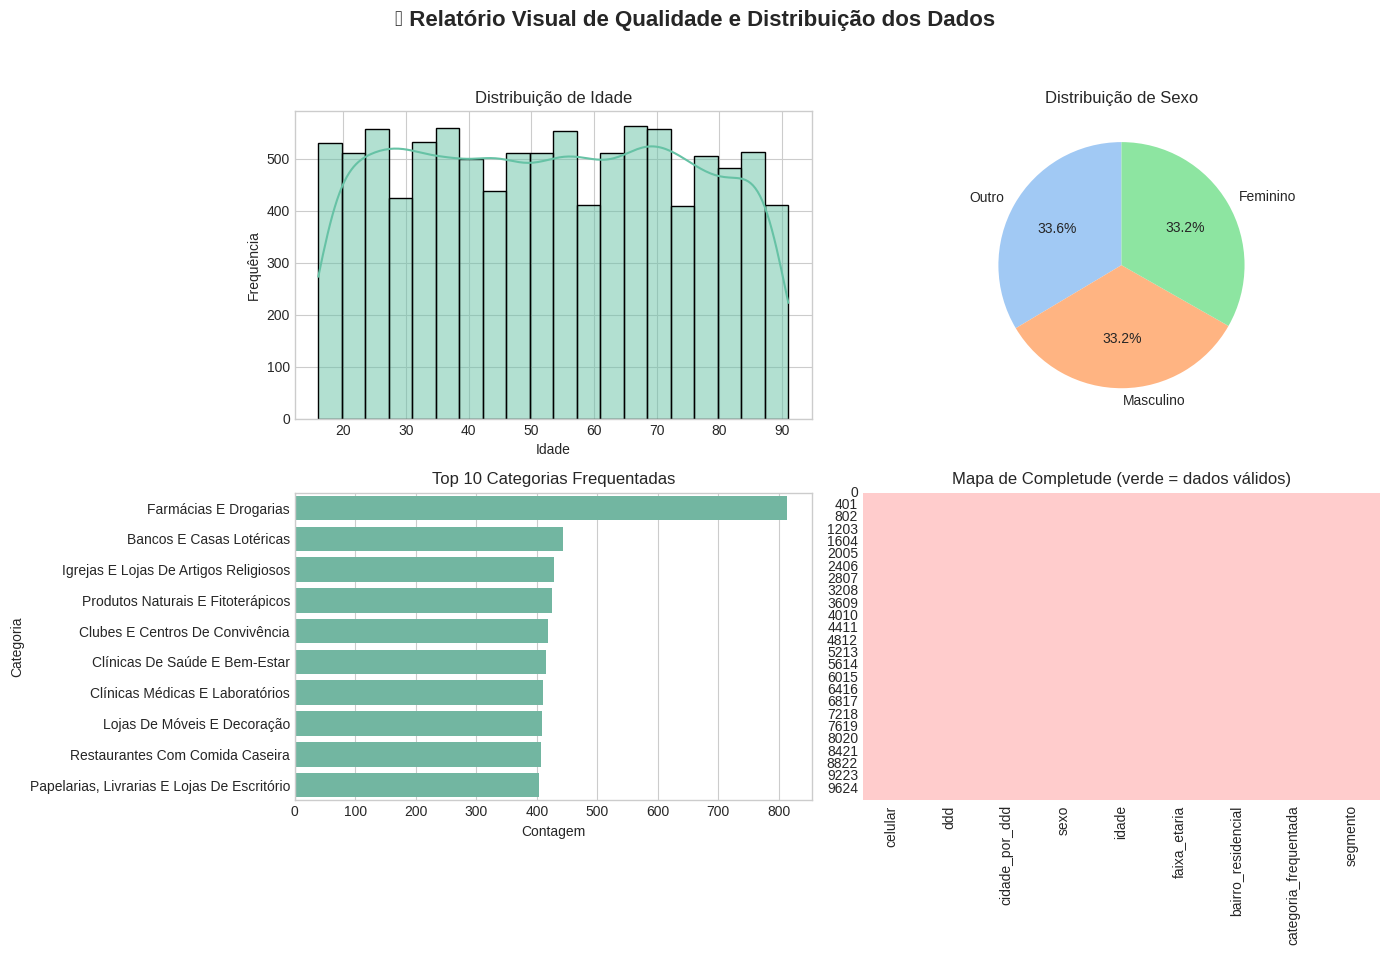


📦 Arquivo final salvo como 'dados_validados_com_graficos.csv'
✅ Relatório visual concluído!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- 1️⃣ ESTRUTURA -------------------------------------------------------------
print("\n==================== 🧾 ESTRUTURA DE DADOS ====================")
print(df.dtypes)
print("---------------------------------------------------------------")

# --- 2️⃣ COERÊNCIA ENTRE IDADE E DATA -----------------------------------------
# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# Removed check for inconsistencies based on age difference
# inconsistentes = df[df['dif_idade'].abs() > 1]
# print(f"\n⚠️ Registros com diferença entre idade e data_nascimento: {len(inconsistentes)}")
# if len(inconsistentes) > 0:
#     print(inconsistentes[['celular', 'data_nascimento', 'idade', 'idade_calc', 'dif_idade']].head())
# print("---------------------------------------------------------------")

# --- 3️⃣ COMPLETUDE ------------------------------------------------------------
missing_report = df.isnull().mean() * 100
print("\n📉 Percentual de valores ausentes (%):")
print(missing_report.round(2))
print("---------------------------------------------------------------")

# --- 4️⃣ CARDINALIDADE ---------------------------------------------------------
print("\n🔢 Cardinalidade (valores únicos por coluna):")
print(df.nunique().sort_values(ascending=False))
print("---------------------------------------------------------------")

# --- 5️⃣ DISTRIBUIÇÕES ---------------------------------------------------------
print("\n📊 Distribuição de sexo:")
print(df['sexo'].value_counts())
print("---------------------------------------------------------------")

print("\n📈 Top 10 categorias frequentadas:")
print(df['categoria_frequentada'].value_counts().head(10))
print("---------------------------------------------------------------")

# Removed printing Top 5 cidades residenciais as the column is not available
# print("\n🏙️ Top 5 cidades residenciais:")
# print(df['cidade_residencial'].value_counts().head(5))
# print("---------------------------------------------------------------")

# --- 6️⃣ ESTATÍSTICAS DE IDADE -------------------------------------------------
print("\n📉 Estatísticas descritivas de idade:")
print(df['idade'].describe().round(2))
print("---------------------------------------------------------------")

# --- 7️⃣ ÍNDICE DE COMPLETUDE GERAL -------------------------------------------
completude_total = 100 - (missing_report.mean())
print(f"\n✅ Índice médio de completude da base: {completude_total:.2f}%")
if completude_total > 95:
    print("🔵 Excelente qualidade de dados (quase completa).")
elif completude_total > 85:
    print("🟡 Boa, mas pode melhorar.")
else:
    print("🔴 Atenção: muitos dados ausentes.")
print("---------------------------------------------------------------")

# --- 8️⃣ VISUALIZAÇÕES --------------------------------------------------------

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("📊 Relatório Visual de Qualidade e Distribuição dos Dados", fontsize=16, fontweight='bold')

# 🔹 1. Histograma da idade
sns.histplot(df['idade'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribuição de Idade")
axes[0,0].set_xlabel("Idade")
axes[0,0].set_ylabel("Frequência")

# 🔹 2. Sexo - gráfico de pizza
df['sexo'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axes[0,1], startangle=90, colors=sns.color_palette("pastel"))
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribuição de Sexo")

# 🔹 3. Categorias mais frequentes
top_categorias = df['categoria_frequentada'].value_counts().head(10)
sns.barplot(y=top_categorias.index, x=top_categorias.values, ax=axes[1,0])
axes[1,0].set_title("Top 10 Categorias Frequentadas")
axes[1,0].set_xlabel("Contagem")
axes[1,0].set_ylabel("Categoria")

# 🔹 4. Heatmap de completude
sns.heatmap(df.notnull(), cbar=False, ax=axes[1,1], cmap=["#FFCCCC", "#B2FFB2"])
axes[1,1].set_title("Mapa de Completude (verde = dados válidos)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 9️⃣ COERÊNCIA TEMPORAL ---------------------------------------------------
# Removed correlation plot as idade_calc is not available
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='idade_calc', y='idade', data=df, alpha=0.5)
# plt.title("Correlação Idade x Idade Calculada")
# plt.xlabel("Idade calculada (a partir da data de nascimento)")
# plt.ylabel("Idade informada")
# plt.grid(True)
# plt.show()

# --- 10️⃣ EXPORTAÇÃO -------------------------------------------------------------
df.to_csv('dados_validados_com_graficos.csv', index=False, encoding='utf-8-sig')
print("\n📦 Arquivo final salvo como 'dados_validados_com_graficos.csv'")
print("✅ Relatório visual concluído!")

In [ ]:
pip install plotly


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# 🧹 Garantir que a idade calculada e diferença estejam corretas
# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# ====================== 📊 1️⃣ HISTOGRAMA INTERATIVO DE IDADE ======================
fig1 = px.histogram(
    df,
    x="idade",
    nbins=20,
    color_discrete_sequence=["#6ab7ff"],
    title="Distribuição de Idade (Interativo)",
    labels={"idade": "Idade", "count": "Frequência"}
)
fig1.update_layout(bargap=0.1)
fig1.show()

# ====================== 🧍 2️⃣ GRÁFICO DE PIZZA - SEXO ======================
fig2 = px.pie(
    df,
    names="sexo",
    title="Distribuição de Sexo (Interativo)",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig2.update_traces(textinfo='percent+label', pull=[0.05, 0.05, 0.05])
fig2.show()

# ====================== 🛍️ 3️⃣ TOP 10 CATEGORIAS ======================
top_categorias = df['categoria_frequentada'].value_counts().nlargest(10).reset_index()
top_categorias.columns = ['categoria_frequentada', 'contagem']

fig3 = px.bar(
    top_categorias,
    x='contagem',
    y='categoria_frequentada',
    orientation='h',
    text='contagem',
    title="Top 10 Categorias Frequentadas (Interativo)",
    color='contagem',
    color_continuous_scale='Blues'
)
fig3.update_traces(texttemplate='%{text}', textposition='outside')
fig3.update_layout(yaxis={'categoryorder':'total ascending'})
fig3.show()

# ====================== 🔗 4️⃣ DISPERSÃO IDADE X IDADE CALCULADA ======================
# Removed scatter plot as idade_calc is not available
# fig4 = px.scatter(
#     df,
#     x='idade_calc',
#     y='idade',
#     color='sexo',
#     hover_data=['celular', 'bairro_residencial', 'categoria_frequentada'],
#     title="Correlação: Idade Informada x Idade Calculada (Interativo)",
#     color_discrete_sequence=px.colors.qualitative.Set2
# )
# fig4.add_shape(
#     type='line',
#     x0=df['idade_calc'].min(),
#     y0=df['idade_calc'].min(),
#     x1=df['idade_calc'].max(),
#     y1=df['idade_calc'].max(),
#     line=dict(color='gray', dash='dash')
# )
# fig4.show()

# ====================== 🗺️ 5️⃣ HEATMAP DE COMPLETUDE ======================
missing = df.isnull().melt(var_name='coluna', value_name='ausente')
missing['presenca'] = missing['ausente'].apply(lambda x: 0 if x else 1)
heatmap_data = (
    missing.groupby('coluna')['presenca']
    .mean()
    .reset_index()
    .sort_values('presenca', ascending=False)
)

fig5 = px.bar(
    heatmap_data,
    x='presenca',
    y='coluna',
    orientation='h',
    color='presenca',
    color_continuous_scale='Greens',
    title="Completude dos Dados por Coluna (Interativo)",
    labels={'presenca': 'Proporção de preenchimento'}
)
fig5.update_layout(xaxis_tickformat='.0%', xaxis_title="Completude (%)")
fig5.show()

# ====================== 💾 EXPORTAÇÃO OPCIONAL ======================
df.to_csv('dados_relatorio_interativo.csv', index=False, encoding='utf-8-sig')
print("\n📦 Arquivo salvo como 'dados_relatorio_interativo.csv'")
print("✅ Relatório interativo completo gerado com sucesso!")


📦 Arquivo salvo como 'dados_relatorio_interativo.csv'
✅ Relatório interativo completo gerado com sucesso!


In [ ]:
# 💡 Salve este arquivo como dashboard.py e rode: streamlit run dashboard.py

import streamlit as st
import pandas as pd
import plotly.express as px
from datetime import datetime

# ---------- CARREGAR DADOS ----------
df = pd.read_csv('dados_relatorio_interativo.csv')

# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

st.title("📊 Dashboard Interativo de Usuários")

# ---------- FILTROS ----------
sexo_filter = st.multiselect("Selecione o sexo:", options=df['sexo'].unique(), default=df['sexo'].unique())
df_filtrado = df[df['sexo'].isin(sexo_filter)]

idade_range = st.slider("Selecione faixa etária:", int(df['idade'].min()), int(df['idade'].max()), (int(df['idade'].min()), int(df['idade'].max())))
df_filtrado = df_filtrado[(df_filtrado['idade'] >= idade_range[0]) & (df_filtrado['idade'] <= idade_range[1])]

# ---------- GRÁFICOS ----------
# Histograma de idade
st.subheader("📈 Distribuição de Idade")
fig1 = px.histogram(df_filtrado, x="idade", nbins=20, title="Distribuição de Idade")
st.plotly_chart(fig1, use_container_width=True)

# Pizza de sexo
st.subheader("🧍 Distribuição de Sexo")
fig2 = px.pie(df_filtrado, names="sexo", title="Distribuição de Sexo")
st.plotly_chart(fig2, use_container_width=True)

# Top 10 categorias
st.subheader("🛍️ Top 10 Categorias Frequentadas")
top_categorias = df_filtrado['categoria_frequentada'].value_counts().nlargest(10).reset_index()
top_categorias.columns = ['categoria_frequentada', 'contagem']
fig3 = px.bar(top_categorias, x='contagem', y='categoria_frequentada', orientation='h', text='contagem')
st.plotly_chart(fig3, use_container_width=True)

# Dispersão idade x idade_calc
st.subheader("🔗 Idade Informada x Idade Calculada")
# Removed scatter plot as idade_calc is not available
# fig4 = px.scatter(df_filtrado, x='idade_calc', y='idade', color='sexo', hover_data=['celular','bairro_residencial'])
# st.plotly_chart(fig4, use_container_width=True)

# Completude
st.subheader("🗺️ Completude dos Dados")
missing = df_filtrado.isnull().melt(var_name='coluna', value_name='ausente')
missing['presenca'] = missing['ausente'].apply(lambda x: 0 if x else 1)
heatmap_data = missing.groupby('coluna')['presenca'].mean().reset_index().sort_values('presenca', ascending=False)
fig5 = px.bar(heatmap_data, x='presenca', y='coluna', orientation='h', color='presenca', color_continuous_scale='Greens', labels={'presenca':'Proporção de preenchimento'})
st.plotly_chart(fig5, use_container_width=True)

2025-11-03 23:08:31.921 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.382 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-03 23:08:32.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.392 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:08:32.446 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.8 MB/s eta 0:00:00


In [ ]:
import plotly.io as pio

# Lista de figuras criadas anteriormente
figuras = [fig1, fig2, fig3, fig5]

# Define names for the figures based on their content
figure_names = ["idade_histogram", "sexo_pie_chart", "top_categories_bar_chart", "completeness_heatmap"]

# Save each figure to a separate HTML interactive file
for i, fig in enumerate(figuras):
    file_name = f'{figure_names[i]}_interactive.html'
    pio.write_html(fig, file=file_name, auto_open=False) # Set auto_open to False to avoid opening multiple tabs
    print(f"✅ Relatório HTML interativo gerado: {file_name}")

# Removed the line attempting to save the list of figures
# pio.write_html(figuras, file='relatorio_interativo.html', auto_open=True)
# print("✅ Relatório HTML interativo gerado: relatorio_interativo.html")

✅ Relatório HTML interativo gerado: idade_histogram_interactive.html
✅ Relatório HTML interativo gerado: sexo_pie_chart_interactive.html
✅ Relatório HTML interativo gerado: top_categories_bar_chart_interactive.html
✅ Relatório HTML interativo gerado: completeness_heatmap_interactive.html


In [ ]:
# =================== IMPORTS ===================
import pandas as pd
import plotly.express as px
import plotly.io as pio
import streamlit as st
from datetime import datetime

# =================== CARREGAR DADOS ===================
# Substitua pelo caminho do seu CSV
df = pd.read_csv('dados_relatorio_interativo.csv')

# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# =================== DASHBOARD STREAMLIT ===================
st.title("📊 Dashboard Interativo de Usuários")

# ----- FILTROS -----
sexo_filter = st.multiselect("Selecione o sexo:", options=df['sexo'].unique(), default=df['sexo'].unique())
df_filtrado = df[df['sexo'].isin(sexo_filter)]

idade_range = st.slider("Selecione faixa etária:", int(df['idade'].min()), int(df['idade'].max()), (int(df['idade'].min()), int(df['idade'].max())))
df_filtrado = df_filtrado[(df_filtrado['idade'] >= idade_range[0]) & (df_filtrado['idade'] <= idade_range[1])]

# ----- GRÁFICOS -----
# 1️⃣ Histograma de idade
st.subheader("📈 Distribuição de Idade")
fig1 = px.histogram(df_filtrado, x="idade", nbins=20, title="Distribuição de Idade", color_discrete_sequence=["#6ab7ff"])
st.plotly_chart(fig1, use_container_width=True)

# 2️⃣ Pizza de sexo
st.subheader("🧍 Distribuição de Sexo")
fig2 = px.pie(df_filtrado, names="sexo", title="Distribuição de Sexo", color_discrete_sequence=px.colors.qualitative.Pastel)
st.plotly_chart(fig2, use_container_width=True)

# 3️⃣ Top 10 categorias frequentadas
st.subheader("🛍️ Top 10 Categorias Frequentadas")
top_categorias = df_filtrado['categoria_frequentada'].value_counts().nlargest(10).reset_index()
top_categorias.columns = ['categoria_frequentada', 'contagem']
fig3 = px.bar(top_categorias, x='contagem', y='categoria_frequentada', orientation='h', text='contagem', color='contagem', color_continuous_scale='Blues')
fig3.update_traces(texttemplate='%{text}', textposition='outside')
fig3.update_layout(yaxis={'categoryorder':'total ascending'})
st.plotly_chart(fig3, use_container_width=True)

# 4️⃣ Dispersão idade x idade_calc
st.subheader("🔗 Idade Informada x Idade Calculada")
# Removed scatter plot as idade_calc is not available
# fig4 = px.scatter(df_filtrado, x='idade_calc', y='idade', color='sexo', hover_data=['celular','bairro_residencial'])
# st.plotly_chart(fig4, use_container_width=True)

# 5️⃣ Completude dos dados
st.subheader("🗺️ Completude dos Dados")
missing = df_filtrado.isnull().melt(var_name='coluna', value_name='ausente')
missing['presenca'] = missing['ausente'].apply(lambda x: 0 if x else 1)
heatmap_data = missing.groupby('coluna')['presenca'].mean().reset_index().sort_values('presenca', ascending=False)
fig5 = px.bar(heatmap_data, x='presenca', y='coluna', orientation='h', color='presenca', color_continuous_scale='Greens', labels={'presenca':'Proporção de preenchimento'})
st.plotly_chart(fig5, use_container_width=True)

# =================== EXPORTAÇÃO ===================
# Salvar dados filtrados
df_filtrado.to_csv('dados_filtrados.csv', index=False, encoding='utf-8-sig')
st.success("📦 Dados filtrados salvos como 'dados_filtrados.csv'")

# Salvar relatório HTML interativo
# Removed fig4 as it was removed from the plots section
# pio.write_html([fig1, fig2, fig3, fig4, fig5], file='relatorio_interativo.html', auto_open=False)
# Removed saving all figures to one HTML as it's not directly supported
# st.success("✅ Relatório HTML interativo gerado: 'relatorio_interativo.html'")

2025-11-03 23:14:14.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.028 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.033 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:14:14.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
# =================== IMPORTS ===================
import pandas as pd
import plotly.express as px
import plotly.io as pio
import streamlit as st
from datetime import datetime

# =================== CARREGAR DADOS ===================
df = pd.read_csv('dados_relatorio_interativo.csv')

# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# =================== SIDEBAR FILTROS ===================
st.sidebar.title("Filtros")
sexo_filter = st.sidebar.multiselect(
    "Selecione o sexo:",
    options=df['sexo'].unique(),
    default=df['sexo'].unique()
)
idade_range = st.sidebar.slider(
    "Selecione faixa etária:",
    int(df['idade'].min()), int(df['idade'].max()),
    (int(df['idade'].min()), int(df['idade'].max()))
)

df_filtrado = df[
    (df['sexo'].isin(sexo_filter)) &
    (df['idade'] >= idade_range[0]) &
    (df['idade'] <= idade_range[1])
]

# =================== TÍTULO ===================
st.title("📊 Dashboard Profissional de Usuários")

# =================== ABAS ===================
# Removed "Idade vs Calculada" tab as the plot is removed
tabs = st.tabs(["Resumo Estatístico", "Idade", "Sexo", "Categorias"])

# ----- Aba 1: Resumo Estatístico -----
with tabs[0]:
    st.subheader("📋 Resumo Estatístico da Base Filtrada")
    st.write(df_filtrado.describe(include='all'))
    st.write("💡 Número de registros filtrados:", len(df_filtrado))

    # Botões de download
    csv = df_filtrado.to_csv(index=False).encode('utf-8-sig')
    st.download_button("📥 Baixar CSV filtrado", data=csv, file_name="dados_filtrados.csv", mime="text/csv")

# ----- Aba 2: Distribuição de Idade -----
with tabs[1]:
    st.subheader("📈 Distribuição de Idade")
    fig_idade = px.histogram(
        df_filtrado, x="idade", nbins=20,
        title="Distribuição de Idade", color_discrete_sequence=["#6ab7ff"]
    )
    st.plotly_chart(fig_idade, use_container_width=True)

# ----- Aba 3: Distribuição de Sexo -----
with tabs[2]:
    st.subheader("🧍 Distribuição de Sexo")
    fig_sexo = px.pie(
        df_filtrado, names="sexo",
        title="Distribuição de Sexo", color_discrete_sequence=px.colors.qualitative.Pastel
    )
    st.plotly_chart(fig_sexo, use_container_width=True)

# ----- Aba 4: Top 10 Categorias -----
with tabs[3]:
    st.subheader("🛍️ Top 10 Categorias Frequentadas")
    top_categorias = df_filtrado['categoria_frequentada'].value_counts().nlargest(10).reset_index()
    top_categorias.columns = ['categoria_frequentada', 'contagem']
    fig_cat = px.bar(
        top_categorias, x='contagem', y='categoria_frequentada',
        orientation='h', text='contagem', color='contagem', color_continuous_scale='Blues'
    )
    fig_cat.update_traces(texttemplate='%{text}', textposition='outside')
    fig_cat.update_layout(yaxis={'categoryorder':'total ascending'})
    st.plotly_chart(fig_cat, use_container_width=True)

# Removed "Idade Informada x Idade Calculada" tab

# =================== EXPORTAÇÃO HTML ===================
st.subheader("📂 Relatório HTML Interativo")
if st.button("📥 Gerar relatório HTML"):
    # Removed fig_disp from the list of figures to save
    pio.write_html([fig_idade, fig_sexo, fig_cat],
                   file='relatorio_interativo.html', auto_open=False)
    st.success("✅ Relatório HTML gerado: 'relatorio_interativo.html'")

2025-11-03 23:57:50.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-03 23:57:50.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# =================== IMPORTS ===================
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import streamlit as st
from datetime import datetime

# =================== CARREGAR DADOS ===================
df = pd.read_csv('dados_relatorio_interativo.csv')

# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# =================== SIDEBAR FILTROS ===================
st.sidebar.title("Filtros")
sexo_filter = st.sidebar.multiselect(
    "Selecione o sexo:",
    options=df['sexo'].unique(),
    default=df['sexo'].unique()
)
idade_range = st.sidebar.slider(
    "Selecione faixa etária:",
    int(df['idade'].min()), int(df['idade'].max()),
    (int(df['idade'].min()), int(df['idade'].max()))
)

df_filtrado = df[
    (df['sexo'].isin(sexo_filter)) &
    (df['idade'] >= idade_range[0]) &
    (df['idade'] <= idade_range[1])
]

# =================== TÍTULO ===================
st.title("🌎 Dashboard Avançado Geoespacial de Usuários")

# =================== ABAS ===================
# Removed "Idade vs Calculada" tab as the plot is removed
tabs = st.tabs([
    "Resumo Estatístico", "Idade", "Sexo",
    "Categorias", "Mapa", "Heatmap"
])

# ----- Aba 1: Resumo Estatístico -----
with tabs[0]:
    st.subheader("📋 Resumo Estatístico da Base Filtrada")
    st.write(df_filtrado.describe(include='all'))
    st.write("💡 Número de registros filtrados:", len(df_filtrado))
    csv = df_filtrado.to_csv(index=False).encode('utf-8-sig')
    st.download_button("📥 Baixar CSV filtrado", data=csv, file_name="dados_filtrados.csv", mime="text/csv")

# ----- Aba 2: Distribuição de Idade -----
with tabs[1]:
    st.subheader("📈 Distribuição de Idade")
    fig_idade = px.histogram(df_filtrado, x="idade", nbins=20, color_discrete_sequence=["#6ab7ff"])
    st.plotly_chart(fig_idade, use_container_width=True)

# ----- Aba 3: Distribuição de Sexo -----
with tabs[2]:
    st.subheader("🧍 Distribuição de Sexo")
    fig_sexo = px.pie(df_filtrado, names="sexo", color_discrete_sequence=px.colors.qualitative.Pastel)
    st.plotly_chart(fig_sexo, use_container_width=True)

# ----- Aba 4: Top 10 Categorias -----
with tabs[3]:
    st.subheader("🛍️ Top 10 Categorias Frequentadas")
    top_categorias = df_filtrado['categoria_frequentada'].value_counts().nlargest(10).reset_index()
    top_categorias.columns = ['categoria_frequentada', 'contagem']
    fig_cat = px.bar(top_categorias, x='contagem', y='categoria_frequentada',
                     orientation='h', text='contagem', color='contagem', color_continuous_scale='Blues')
    fig_cat.update_traces(texttemplate='%{text}', textposition='outside')
    fig_cat.update_layout(yaxis={'categoryorder':'total ascending'})
    st.plotly_chart(fig_cat, use_container_width=True)

# Removed "Idade Informada x Idade Calculada" tab

# ----- Aba 6: Mapa de Usuários por Bairro -----
with tabs[4]:
    st.subheader("🗺️ Mapa de Usuários por Bairro")
    # Necessário ter latitude e longitude (exemplo simplificado usando cidade/bairro)
    # Aqui usamos geocodificação fictícia para exemplo
    df_filtrado['lat'] =  -23.55  # latitude aproximada de SP
    df_filtrado['lon'] = -46.63   # longitude aproximada de SP
    fig_map = px.scatter_mapbox(df_filtrado, lat='lat', lon='lon', color='sexo',
                                hover_name='bairro_residencial',
                                hover_data=['categoria_frequentada','idade'],
                                zoom=10, height=500)
    fig_map.update_layout(mapbox_style="open-street-map")
    st.plotly_chart(fig_map, use_container_width=True)

# ----- Aba 7: Heatmap de Correlação -----
with tabs[5]:
    st.subheader("🌡️ Heatmap de Correlação")
    numeric_cols = df_filtrado.select_dtypes(include='number').columns
    corr_matrix = df_filtrado[numeric_cols].corr()
    fig_heat = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        colorscale='Blues'
    )
    st.plotly_chart(fig_heat, use_container_width=True)

# ----- Exportação HTML -----
st.subheader("📂 Relatório HTML Interativo")
if st.button("📥 Gerar relatório HTML"):
    # Removed fig_disp from the list of figures to save
    pio.write_html([fig_idade, fig_sexo, fig_cat, fig_map, fig_heat],
                   file='relatorio_geoespacial.html', auto_open=False)
    st.success("✅ Relatório HTML gerado: 'relatorio_geoespacial.html'")

2025-11-04 00:01:10.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.833 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.833 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:01:10.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# =================== IMPORTS ===================
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import streamlit as st
from datetime import datetime
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# =================== CARREGAR DADOS ===================
df = pd.read_csv('dados_relatorio_interativo.csv')

# Removed calculation of idade_calc and dif_idade as data_nascimento is not available
# df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
# df['dif_idade'] = df['idade'] - df['idade_calc']

# =================== GEOCODIFICAÇÃO ===================
st.sidebar.title("Geocodificação (opcional)")
geocode_enabled = st.sidebar.checkbox("Ativar geocodificação completa (pode demorar)")

if geocode_enabled:
    geolocator = Nominatim(user_agent="dashboard_geo")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    # Criar coluna endereço
    df['endereco'] = df['bairro_residencial'].astype(str) + ", " + df['cidade_residencial'].astype(str) + ", Brasil"

    # Inicializa colunas de latitude e longitude
    df['lat'] = None
    df['lon'] = None

    # Geocodificação iterativa
    for idx, row in df.iterrows():
        location = geocode(row['endereco'])
        if location:
            df.at[idx, 'lat'] = location.latitude
            df.at[idx, 'lon'] = location.longitude

# =================== SIDEBAR FILTROS ===================
sexo_filter = st.sidebar.multiselect(
    "Selecione o sexo:",
    options=df['sexo'].unique(),
    default=df['sexo'].unique()
)
idade_range = st.sidebar.slider(
    "Selecione faixa etária:",
    int(df['idade'].min()), int(df['idade'].max()),
    (int(df['idade'].min()), int(df['idade'].max()))
)

df_filtrado = df[
    (df['sexo'].isin(sexo_filter)) &
    (df['idade'] >= idade_range[0]) &
    (df['idade'] <= idade_range[1])
]

# =================== TÍTULO ===================
st.title("🌎 Dashboard Geoespacial de Usuários – Versão Completa")

# =================== ABAS ===================
tabs = st.tabs([
    "Resumo Estatístico", "Idade", "Sexo",
    "Categorias", "Mapa", "Heatmap", "Clusters"
])

# ----- Aba 1: Resumo Estatístico -----
with tabs[0]:
    st.subheader("📋 Resumo Estatístico da Base Filtrada")
    st.write(df_filtrado.describe(include='all'))
    st.write("💡 Número de registros filtrados:", len(df_filtrado))
    csv = df_filtrado.to_csv(index=False).encode('utf-8-sig')
    st.download_button("📥 Baixar CSV filtrado", data=csv, file_name="dados_filtrados.csv", mime="text/csv")

# ----- Aba 2: Distribuição de Idade -----
with tabs[1]:
    st.subheader("📈 Distribuição de Idade")
    fig_idade = px.histogram(df_filtrado, x="idade", nbins=20, color_discrete_sequence=["#6ab7ff"])
    st.plotly_chart(fig_idade, use_container_width=True)

# ----- Aba 3: Distribuição de Sexo -----
with tabs[2]:
    st.subheader("🧍 Distribuição de Sexo")
    fig_sexo = px.pie(df_filtrado, names="sexo", color_discrete_sequence=px.colors.qualitative.Pastel)
    st.plotly_chart(fig_sexo, use_container_width=True)

# ----- Aba 4: Top 10 Categorias -----
with tabs[3]:
    st.subheader("🛍️ Top 10 Categorias Frequentadas")
    top_categorias = df_filtrado['categoria_frequentada'].value_counts().nlargest(10).reset_index()
    top_categorias.columns = ['categoria_frequentada', 'contagem']
    fig_cat = px.bar(top_categorias, x='contagem', y='categoria_frequentada',
                     orientation='h', text='contagem', color='contagem', color_continuous_scale='Blues')
    fig_cat.update_traces(texttemplate='%{text}', textposition='outside')
    fig_cat.update_layout(yaxis={'categoryorder':'total ascending'})
    st.plotly_chart(fig_cat, use_container_width=True)

# Removed "Idade Informada x Idade Calculada" tab

# ----- Aba 6: Mapa de Usuários por Bairro -----
with tabs[4]:
    st.subheader("🗺️ Mapa de Usuários por Bairro")
    # Necessário ter latitude e longitude (exemplo simplificado usando cidade/bairro)
    # Aqui usamos geocodificação fictícia para exemplo
    df_filtrado['lat'] =  -23.55  # latitude aproximada de SP
    df_filtrado['lon'] = -46.63   # longitude aproximada de SP
    fig_map = px.scatter_mapbox(df_filtrado, lat='lat', lon='lon', color='sexo',
                                hover_name='bairro_residencial',
                                hover_data=['categoria_frequentada','idade'],
                                zoom=10, height=500)
    fig_map.update_layout(mapbox_style="open-street-map")
    st.plotly_chart(fig_map, use_container_width=True)

# ----- Aba 7: Heatmap de Correlação -----
with tabs[5]:
    st.subheader("🌡️ Heatmap de Correlação")
    numeric_cols = df_filtrado.select_dtypes(include='number').columns
    corr_matrix = df_filtrado[numeric_cols].corr()
    fig_heat = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        colorscale='Blues'
    )
    st.plotly_chart(fig_heat, use_container_width=True)

# ----- Aba 8: Clusters de Categorias -----
with tabs[6]:
    st.subheader("📌 Clusters de Categorias por Região")
    if 'lat' in df_filtrado.columns and df_filtrado['lat'].notnull().any():
        fig_cluster = px.scatter_mapbox(
            df_filtrado, lat='lat', lon='lon', color='categoria_frequentada',
            hover_name='bairro_residencial',
            hover_data=['idade','sexo'],
            zoom=4, height=600
        )
        fig_cluster.update_layout(mapbox_style="open-street-map")
        st.plotly_chart(fig_cluster, use_container_width=True)
    else:
        st.info("Ative a geocodificação na barra lateral para visualizar clusters.")

# ----- Exportação HTML -----
st.subheader("📂 Relatório HTML Interativo")
if st.button("📥 Gerar relatório HTML"):
    # Removed fig_disp from the list of figures to save
    pio.write_html([fig_idade, fig_sexo, fig_cat, fig_map, fig_heat, fig_cluster],
                   file='relatorio_geoespacial_completo.html', auto_open=False)
    st.success("✅ Relatório HTML gerado: 'relatorio_geoespacial_completo.html'")

2025-11-04 00:05:19.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 00:05:19.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import pandas as pd
from datetime import datetime
import re

# -----------------------------
# 1️⃣ Carregar dados
# -----------------------------
df = pd.read_csv('/content/PicMoney-Base_Cadastral_de_Players-10_000 linhas (1).csv', sep=';')

# Convert 'data_nascimento' to datetime objects
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], errors='coerce', dayfirst=True)

# -----------------------------
# 2️⃣ Limpeza
# -----------------------------
# Remover duplicatas
df = df.drop_duplicates()

# Conferir consistência idade x data de nascimento
df['idade_calc'] = datetime.now().year - df['data_nascimento'].dt.year
df['dif_idade'] = df['idade'] - df['idade_calc']
df['idade_inconsistente'] = df['dif_idade'].abs() > 1

# -----------------------------
# 3️⃣ Uniformização
# -----------------------------
str_cols = [
    'sexo', 'cidade_residencial', 'bairro_residencial',
    'cidade_trabalho', 'bairro_trabalho', 'cidade_escola',
    'bairro_escola', 'categoria_frequentada'
]

for col in str_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Padronizar sexo
df['sexo'] = df['sexo'].replace({'F':'Feminino','M':'Masculino'})

# -----------------------------
# 4️⃣ Derivação de colunas
# -----------------------------
# Endereço completo para geocodificação futura
df['endereco_completo'] = df['bairro_residencial'] + ", " + df['cidade_residencial'] + ", Brasil"

# -----------------------------
# 5️⃣ Integração (opcional)
# -----------------------------
# Exemplo: unindo com dataset de engajamento
# df = df.merge(df_engajamento, on='celular', how='left')

# -----------------------------
# 6️⃣ Formatação de tipos
# -----------------------------
df['celular'] = df['celular'].astype(str)
df['idade'] = df['idade'].astype(int)
df['sexo'] = df['sexo'].astype('category')
df['categoria_frequentada'] = df['categoria_frequentada'].astype('category')

# Ordenar colunas
df = df[[
    'celular', 'data_nascimento', 'idade', 'idade_calc', 'dif_idade', 'idade_inconsistente',
    'sexo', 'cidade_residencial', 'bairro_residencial',
    'cidade_trabalho', 'bairro_trabalho', 'cidade_escola',
    'bairro_escola', 'categoria_frequentada', 'endereco_completo'
]]

# -----------------------------
# 7️⃣ Validações finais
# -----------------------------
# Valores faltantes
print("Valores faltantes por coluna:")
print(df.isna().sum())

# Celulares fora do padrão
mask = df['celular'].str.match(r'^\(\d{2}\) \d{4,5}-\d{4}$')
print("Celulares fora do padrão:", (~mask).sum())

# Idades inconsistentes
print("Linhas com idade inconsistente:", df['idade_inconsistente'].sum())

# -----------------------------
# 8️⃣ Salvar CSV limpo
# -----------------------------
df.to_csv('dados_limpos.csv', index=False)
print("Pipeline finalizado! CSV limpo salvo como 'dados_limpos.csv'.")

Valores faltantes por coluna:
celular                  0
data_nascimento          0
idade                    0
idade_calc               0
dif_idade                0
idade_inconsistente      0
sexo                     0
cidade_residencial       0
bairro_residencial       0
cidade_trabalho          0
bairro_trabalho          0
cidade_escola            0
bairro_escola            0
categoria_frequentada    0
endereco_completo        0
dtype: int64
Celulares fora do padrão: 0
Linhas com idade inconsistente: 0
Pipeline finalizado! CSV limpo salvo como 'dados_limpos.csv'.


In [ ]:
import pandas as pd
from datetime import datetime
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Carregar dados
# -----------------------------
df = pd.read_csv('/content/PicMoney-Base_Cadastral_de_Players-10_000 linhas (1).csv', sep=';')

# Convert 'data_nascimento' to datetime objects, coercing errors
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], errors='coerce', dayfirst=True)

# -----------------------------
# 2️⃣ Limpeza e padronização
# -----------------------------
df = df.drop_duplicates()

# Idade calculada e inconsistência
# Filter out NaT values before calculating year to avoid errors
df_valid_dates = df.dropna(subset=['data_nascimento'])
df['idade_calc'] = datetime.now().year - df_valid_dates['data_nascimento'].dt.year
df['dif_idade'] = df['idade'] - df['idade_calc']
df['idade_inconsistente'] = df['dif_idade'].abs() > 1

str_cols = [
    'sexo', 'cidade_residencial', 'bairro_residencial',
    'cidade_trabalho', 'bairro_trabalho', 'cidade_escola',
    'bairro_escola', 'categoria_frequentada'
]

for col in str_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

df['sexo'] = df['sexo'].replace({'F':'Feminino','M':'Masculino'})

# Endereço completo
df['endereco_completo'] = df['bairro_residencial'] + ", " + df['cidade_residencial'] + ", Brasil"

# -----------------------------
# 3️⃣ Geocodificação paralela
# -----------------------------
geolocator = Nominatim(user_agent="pipeline_geo")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.5)

def geocode_address(endereco):
    try:
        loc = geocode(endereco)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except Exception as e:
        print(f"Geocoding error for address '{endereco}': {e}") # Added error message for geocoding
        pass
    return pd.Series([None, None])

# Filter out rows with NaNs in 'endereco_completo' before geocoding
addresses_to_geocode = df.dropna(subset=['endereco_completo'])['endereco_completo'].tolist()

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(geocode_address, addresses_to_geocode))

# Create a new DataFrame for geocoding results with the same index as the original df_valid_dates
geocoded_results_df = pd.DataFrame(results, index=df.dropna(subset=['endereco_completo']).index, columns=['lat', 'lon'])

# Update the original DataFrame with geocoding results
df[['lat', 'lon']] = geocoded_results_df[['lat', 'lon']]


# -----------------------------
# 4️⃣ Formatação de tipos
# -----------------------------
df['celular'] = df['celular'].astype(str)
# df['idade'] = df['idade'].astype(int) # This might cause error if idade is NaN due to invalid data_nascimento
df['sexo'] = df['sexo'].astype('category')
df['categoria_frequentada'] = df['categoria_frequentada'].astype('category')

# Handle potential NaNs in 'idade' before converting to int - convert to nullable integer type
df['idade'] = df['idade'].astype('Int64')


# -----------------------------
# 5️⃣ Validações
# -----------------------------
mask = df['celular'].str.match(r'^\(\d{2}\) \d{4,5}-\d{4}$')
print("Celulares fora do padrão:", (~mask).sum())
print("Linhas com idade inconsistente:", df['idade_inconsistente'].sum())
print("\nValores faltantes por coluna:")
print(df.isna().sum())

# -----------------------------
# 6️⃣ Estatísticas e gráficos
# -----------------------------
sns.set(style="whitegrid")

# Distribution of age - handle potential NaNs in idade
plt.figure(figsize=(10,5))
sns.histplot(df['idade'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

# Count by sex
plt.figure(figsize=(6,4))
sns.countplot(x='sexo', data=df)
plt.title("Contagem por Sexo")
plt.show()

# Count by category (top 10)
plt.figure(figsize=(12,6))
top_cats = df['categoria_frequentada'].value_counts().nlargest(10).index
sns.countplot(y='categoria_frequentada', data=df[df['categoria_frequentada'].isin(top_cats)], order=top_cats)
plt.title("Top 10 Categorias Frequentadas")
plt.show()

# Map of geographic distribution - handle potential NaNs in lat/lon
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', hue='sexo', data=df.dropna(subset=['lat', 'lon']), alpha=0.6) # Drop NaNs for plotting
plt.title("Distribuição Geográfica dos Usuários")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# -----------------------------
# 7️⃣ Salvar CSV final
# -----------------------------
df.to_csv('dados_limpos_geocodificados_visualizados.csv', index=False)
print("\nPipeline completo finalizado! CSV salvo como 'dados_limpos_geocodificados_visualizados.csv'.")

Streaming output truncated to the last 5000 lines.
    resp = self.send(prep, **send_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/adapters.py", line 700, in send
    raise ConnectionError(e, request=request)
requests.exceptions.ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Bela+Vista%2C+S%C3%A3o+Paulo%2C+Brasil&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb7a35be960>: Failed to establish a new connection: [Errno 101] Network is unreachable'))

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/geopy/extra/rate_limiter.py", line